In [52]:
# Visualize training history
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
import math
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#create a path to the file

file_path = "shopping.csv"

#read the csv file a pandas dataframe
df = pd.read_csv(file_path)

#print the dataframe column data types


In [53]:
#define a mapping scheme for the values not a number
bool_mapping={
    "TRUE":1,
    "FALSE":0
}

visitor_mapping={
    "Returning_Visitor":1,
    "New_Visitor":2,
    "Other":3
}

month_mapping={
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "June":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}

In [54]:

df['Revenue']=df['Revenue'].astype(str)
df['Weekend']=df['Weekend'].astype(str)
df['Revenue'] = df['Revenue'].str.upper()
df['Weekend'] = df['Weekend'].str.upper()

In [56]:
df['Month'] = df['Month'].replace(month_mapping)
df['VisitorType'] = df['VisitorType'].replace(visitor_mapping)
df['Revenue'] = df['Revenue'].replace(bool_mapping)  
df['Weekend'] = df['Weekend'].replace(bool_mapping)

In [57]:
# Convert columns to appropriate types
type_conversion = {
    'Month': 'int32',
    'VisitorType': 'int32',
    'Revenue': 'int32',
    'Weekend': 'int32',
    'Administrative': 'int32',
    'Administrative_Duration': 'float32',
    'Informational': 'int32',
    'Informational_Duration': 'float32',
    'ProductRelated': 'int32',
    'ProductRelated_Duration': 'float32',
    'BounceRates': 'float32',
    'ExitRates': 'float32',
    'PageValues': 'float32',
    'SpecialDay': 'float32',
    'OperatingSystems': 'int32',
    'Browser': 'int32',
    'Region': 'int32',
    'TrafficType': 'int32'
}

# Apply conversions
df = df.astype(type_conversion)

In [58]:
def sigmoid(z):
    
    g = 1 / (1 + math.e**-z)
    
    return g

In [59]:
def calculate_accuracy(labels, predictions):
    
    # Calculate the number of correct predictions by comparing 'labels' and 'predictions'
    correct_predictions = np.sum(labels == predictions)
    
    # Calculate the total number of predictions
    total_predictions = len(labels)
    
    # Calculate the accuracy as a percentage
    accuracy_percentage = (correct_predictions / total_predictions) * 100.0
    
    print(f"Accuracy: {accuracy_percentage:.2f}%")

In [60]:
#modfule ot create and display confusion matrix
def print_confusion_matrix(true_labels, predictions):
    #plot the confusion matrix
    mat = confusion_matrix(true_labels, predictions)
    plot_confusion_matrix(conf_mat=mat)

    #calculate prcision, recall, f1 scores and display them
    #precision
    precision = precision_score(true_labels, predictions)

    #recall
    recall = recall_score(true_labels,predictions)

    #f1 scoree
    f1 = f1_score(true_labels, predictions)

    #display precisionm, recall, f1 score
    print(f"Precision: {precision: .2f}")
    print(f"Recall: {recall: .2f}")
    print(f"f1 score: {f1: .2f}")

    return

In [61]:
#function to make prediction
def get_predictions(feature_data):
    #run feature data through the trained model to get the activations
    logits = model(feature_data)

    #get the prediction probability
    logits = sigmoid(logits)

    #get predictions
    predictions = logits >= 0.5

    #convert true to 1 and flase to 0
    predictions = [int(boolean) for boolean in predictions]

    return predictions

In [62]:
def load_data(df):
    # Ensure the DataFrame is already transformed (with all floats and ints)
    
    # Split the data into features (X) and target (y)
    X = df.iloc[:, :-1].values  # All columns except the last
    y = df.iloc[:, -1].values    # The last column
    
    return X, y

In [63]:
#load the dataset
features, y = load_data(df)

#scale the data using the standard scaler
#Create a scaler object
scaler = StandardScaler()

X = scaler.fit_transform(features)
print(X)
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

[[ 0.21173582  0.35206422 -0.38787235 ...  1.71636354 -0.39932615
  -0.55763754]
 [ 1.11273931  2.00864764  1.14643284 ... -0.51300172 -0.39932615
  -0.55763754]
 [-0.38893317 -0.21742069 -0.38787235 ... -0.51300172 -0.39932615
  -0.55763754]
 ...
 [-0.68926767 -0.44844478 -0.38787235 ... -0.76070897 -0.39932615
  -0.55763754]
 [-0.68926767 -0.44844478 -0.38787235 ... -0.51300172 -0.39932615
   1.79327957]
 [-0.08859868 -0.3866511  -0.38787235 ... -0.76070897 -0.39932615
  -0.55763754]]
X shape: (5000, 17)
Y shape: (5000,)


In [64]:
#Split the training data into training, Cross validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#splits to 60:40

#split the test set 50:50 for the cs and test sets. splits the 40 into half. so 60:20:20
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size = 0.5)

#print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")


print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")

print(X_train.dtype, y_train.dtype)
print(X_cv.dtype, y_cv.dtype)
df.dtypes
y_train = y_train.astype('float32')
y_cv = y_cv.astype('float32')
print(np.unique(y_train))
print(np.unique(y_cv))
df.dtypes


X_train shape: (3000, 17)
X_test shape: (1000, 17)
X_cv shape: (1000, 17)
y_train shape: (3000,)
y_test shape: (1000,)
y_cv shape: (1000,)
float64 int32
float64 int32
[0. 1.]
[0. 1.]


Administrative               int32
Administrative_Duration    float32
Informational                int32
Informational_Duration     float32
ProductRelated               int32
ProductRelated_Duration    float32
BounceRates                float32
ExitRates                  float32
PageValues                 float32
SpecialDay                 float32
Month                        int32
OperatingSystems             int32
Browser                      int32
Region                       int32
TrafficType                  int32
VisitorType                  int32
Weekend                      int32
Revenue                      int32
dtype: object

In [65]:
#create the model
model = Sequential([
    tf.keras.Input(shape=(17,)),
    Dense(14, activation='relu'),
    Dense(7, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

#print model summary
model.summary()

#compile our model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.0005),
    metrics=['accuracy']
)

#fit the model
history = model.fit(
    X_train, y_train,
    validation_data = [X_cv, y_cv],
    epochs=50
)

#list the history data
print(history.history.keys())


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 14)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394 (1.54 KB)

 Trainable params: 394 (1.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8022 - loss: 0.7495 - val_accuracy: 0.8280 - val_loss: 0.6942
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 0.6865 - val_accuracy: 0.8300 - val_loss: 0.6589
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.6486 - val_accuracy: 0.8300 - val_loss: 0.6188
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.5996 - val_accuracy: 0.8320 - val_loss: 0.5496
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8480 - loss: 0.5253 - val_accuracy: 0.8340 - val_loss: 0.4585
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.4144 - val_accuracy: 0.8470 - val_loss: 0.3979
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3588 - val_accuracy: 0.8490 - val_loss: 0.3705
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8835 - loss: 0.3238 - val_accuracy: 0.8500 - val_loss:

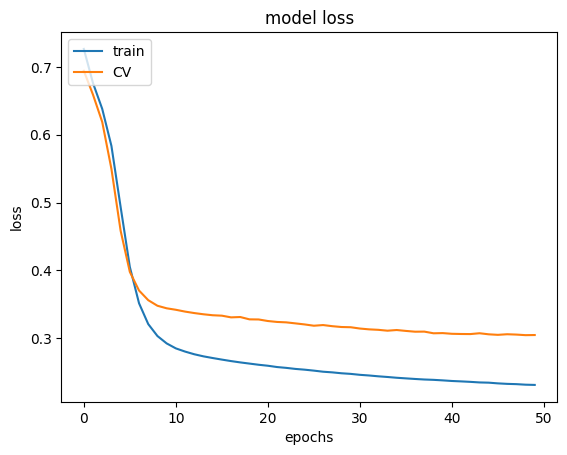

In [66]:
#summary for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

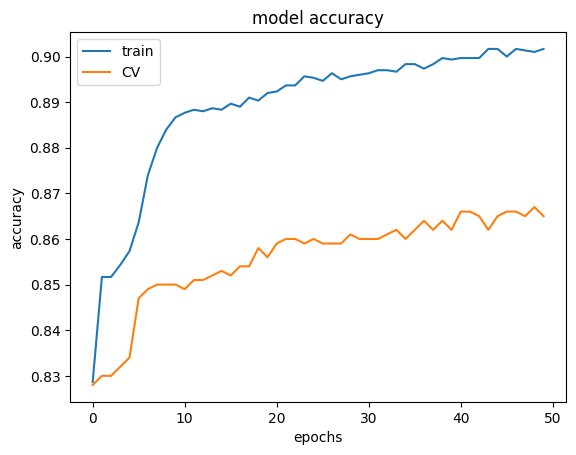

In [67]:
#summary for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'CV'], loc='upper left')
plt.show()

In [68]:
prediction_train = get_predictions(X_train)


In [69]:
calculate_accuracy(y_train, prediction_train)


Accuracy: 90.27%


Precision:  0.76
Recall:  0.50
f1 score:  0.61


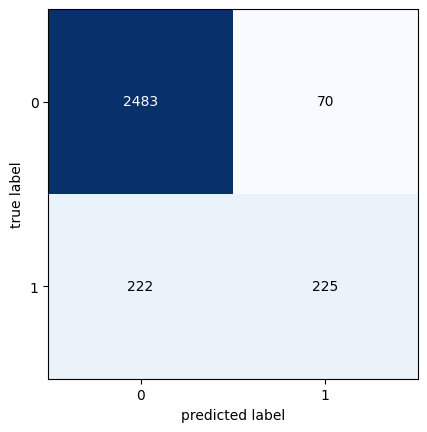

In [70]:
print_confusion_matrix(y_train, prediction_train)

In [71]:
#get accuracy for the CV set
prediction_cv = get_predictions(X_cv)
calculate_accuracy(y_cv, prediction_cv)

Accuracy: 87.20%


In [72]:
#evalulate the model on the test set
print("Evalulate on test data")
results = model.evaluate(X_test, y_test)
print(f"Test loss, test accuracy: {results}")

Evalulate on test data
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8892 - loss: 0.2732  
Test loss, test accuracy: [0.27129238843917847, 0.8899999856948853]


In [73]:
#deterine the prediction accuracy
prediction_test = get_predictions(X_test)
calculate_accuracy(y_test, prediction_test)

Accuracy: 89.00%
